# Generation of Heterogenous Dataset for Federated Learning for Molecular Property Prediction

NOTE: Please do not edit the code cells! Colab doesn't handle multi-user real time collaboration very well. However, please feel free to leave as many comments as you wish!

## Installation

In [1]:
# Install Rdkit, OGB and DGL/DGL Life for datasets
# You may need to restart the runtime
!pip3 install rdkit
!pip3 install dgl
!pip3 install dgllife
!pip3 install ogb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 483 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 6.4 MB/s 
     |████████████████████████████████| 291 kB 68.9 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 9.5 MB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 78 kB 5.0 MB/s 
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=00611263104476235b63f0f4b2f5772e07a671a56f1cde9b938f6d10407ba1f0
  Stored in directo

In [2]:
# Install torch_geometric
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip3 install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip3 install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip3 install -q git+https://github.com/pyg-team/pytorch_geometric.git

1.12.1+cu113
     |████████████████████████████████| 7.9 MB 8.0 MB/s 
     |████████████████████████████████| 3.5 MB 7.3 MB/s 


In [ ]:
# turn on debugger
!pip install -Uqq ipdb
import ipdb
%pdb on

## Downloading datasets

The code section below is heavily adapted from the FedChem paper at https://github.com/ur-whitelab/fedchem/blob/main/downloadDataset.py

In [3]:
import json
import numpy as np
import torch
import matplotlib.pyplot as plt

import dgl
from dgllife.utils import smiles_to_bigraph, CanonicalAtomFeaturizer
from dgllife.data import BACE, BBBP, ClinTox, ESOL, Lipophilicity, FreeSolv, SIDER, Tox21
from ogb.lsc import PCQM4Mv2Dataset
from torch_geometric.datasets import QM9

def getDataset(datasetName, load_prev=True):
    # if datasetName == 'qm9':
    #     dataset = QM9("/root/.dgl/QM9")
    # QM9 is too huge! Not sure what they have in their dataset but I only need smiles and label :/

    if datasetName == "PCQM4Mv2":
        dataset = PCQM4Mv2Dataset(only_smiles = True)

    elif datasetName in ['BACE', 'BBBP', 'ClinTox', 'Esol', 'Freesolv',
                         'Lipophilicity', 'SIDER', 'Tox21', 'qm9']:

        node_featurizer = CanonicalAtomFeaturizer()

        if datasetName == 'BACE':  
            dataset = BACE(smiles_to_bigraph, node_featurizer, load=load_prev)
        elif datasetName == 'BBBP':  
            dataset = BBBP(smiles_to_bigraph, node_featurizer, load=load_prev)
        elif datasetName == 'ClinTox':  
            dataset = ClinTox(smiles_to_bigraph, node_featurizer, load=load_prev)
        elif datasetName == 'Esol':
            dataset = ESOL(smiles_to_bigraph, node_featurizer, load=load_prev)
        elif datasetName == 'Freesolv':
            dataset = FreeSolv(smiles_to_bigraph, node_featurizer, load=load_prev)
        elif datasetName == 'Lipophilicity':
            dataset = Lipophilicity(smiles_to_bigraph, node_featurizer, load=load_prev)
        elif datasetName == 'SIDER':  
            dataset = SIDER(smiles_to_bigraph, node_featurizer, load=load_prev)
        elif datasetName == 'Tox21':  
            dataset = Tox21(smiles_to_bigraph, node_featurizer, load=load_prev)
        else:
            raise ValueError(f'Unexpected dataset: {datasetName}')

    return dataset

for i in ['BACE', 'BBBP', 'ClinTox', 'Esol', 'Freesolv', 'Lipophilicity', 'SIDER', 'Tox21', 'PCQM4Mv2']:
    print("start to download "+i)
    getDataset(i, load_prev=False)
    print(i+" finished ")

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
start to download BACE
Extracting file to /root/.dgl/bace
Processing dgl graphs from scratch...
Processing molecule 1000/1513
BACE finished 
start to download BBBP
Extracting file to /root/.dgl/bbbp
Processing dgl graphs from scratch...
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Processing molecule 1000/2050
Processing molecule 2000/2050
BBBP finished 
start to download ClinTox
Extracting file to /root/.dgl/clintox
Processing dgl graphs from scratch...
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Processing molecule 1000/1484
Invalid mol found
Invalid mol found
ClinTox finished 
start to download Esol
Extracti

Downloaded 0.06 GB: 100%|██████████| 60/60 [00:01<00:00, 59.88it/s]


Extracting dataset/pcqm4m-v2.zip
PCQM4Mv2 finished 


## Molecular Fingerprinting

In the field of drug discovery, pharmaceutical companies would specialise into different chemical domains to achieve a competitive advantage over other companies. Similarly, in an academic setting, research institutions would have a heterogeneous distribution of experts in different chemical fields, and hence their privately held data would not be drawn independently and individually across the global chemical space. Thus, in our setting of Federated Learning, it is realistic to assume that private datasets owned by the organisations have hetereogenous distributions. 

This problem is also acknowledged by FedChem, and their method involves splitting molecules by scaffold splitting. Scaffold splitting sorts molecules by their backbone structure such that molecules that share a similar structural backbone are grouped together. This is possible in a pharmaceutical/drug discovery setting since molecules are usually synthesised from a base molecule (which is the chemical backbone itself); however, some datasets in FedChem are not related to drug discovery, thus scaffold splitting is inappropriately used. Instead, cheminformatics (the field of chemistry and information science) uses [molecular fingerprints](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-015-0069-3) to classify molecules. These fingerprints are based on functional groups or short substructures that are present in molecules, and are more widely applicable than scaffold splitting. As a result, we split molecules into groups based on the Tanimoto similarity between [ECFP4 fingerprints](https://pubs.acs.org/doi/10.1021/ci100050t). 

In [4]:
# See http://www.dalkescientific.com/writings/diary/archive/2020/10/02/using_rdkit_bulktanimotosimilarity.html
# https://github.com/deepchem/deepchem/blob/master/deepchem/splits/splitters.py#L1220-L1287

from rdkit.Chem import AllChem

def get_fingerprints(smiles_list, nBits=1024):
    mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
    return [AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits) for x in mol_list]


## Clustering using Latent Dirichlet Allocation (LDA)

With the vectorised representations of molecules, LDA can be used as an unsupervised learning method to fit the molecules into X different groups, where X would be the number of organisations for Federated Learning in our problem statement. As stated in FedChem, the heterogeneity of datasets can be controlled by tuning the $\alpha$ parameter in LDA, and we use it similarly. 

For more information on how the $\alpha$ parameter changes the behaviour of LDA, see https://stats.stackexchange.com/questions/244917/what-exactly-is-the-alpha-in-the-dirichlet-distribution

In [14]:
from sklearn.decomposition import LatentDirichletAllocation

def split_data_LDA(vectors, num_grps, alpha):
    """
    Clusters vectors using Latent Dirichlet Allocation
    args:
        vectors:      List of fingerprint representation of molecules
        num_grps:     Number of clusters
        alpha:        (0,1]. Controls heterogeneity of dataset, lower values being more distinct
    return:
        cluster_idx:  N numpy array. Index of cluster for each row in vector
    """
    
    lda = LatentDirichletAllocation(n_components=num_grps, doc_topic_prior=alpha,
                                    learning_method="online", random_state=0)
    lda.fit(vectors)

    # Gives prob of each fingerprint in FPS belonging to the organisation
    group_logits = lda.transform(vectors)

    cluster_idx = np.argmax(group_logits, axis=1)

    net_dataidx_map = {}
    idxs = np.arange(len(vectors))
    for i in range(num_grps):
        net_dataidx_map[i] = idxs[cluster_idx == i]
        np.random.shuffle(net_dataidx_map[i])
        net_dataidx_map[i] = net_dataidx_map[i].tolist()

    return net_dataidx_map

## Scaffold Clustering

An analogy of scaffolds is something like roots of words. A scaffold of a molecule is the base structure without modifications, usually in the form of a carbon structure. Thus, similar molecules are grouped together by the basis of their molecular structure. However, this is applicable mainly to drug-like molecules, and is less effective for small molecules. 

In [6]:
import rdkit.Chem

def scaffold_clustering(smiles_list):
    d = {}
    cluster_id = 0
    ans = []
    for idx, smiles in enumerate(smiles_list):
        scaffold = rdkit.Chem.Scaffolds.MurckoScaffold.MurckoScaffoldSmilesFromSmiles(smiles)
        if scaffold not in d:
            d[scaffold] = cluster_id
            cluster_id += 1
        ans.append(d[scaffold])
    return np.asarray(ans)

## Splitting

In [15]:
# The code below is modified from the following repo:
# https://github.com/FedML-AI/FedML/blob/master/python/fedml/core/data/noniid_partition.py
# Needs cleanup. Should probably also remove the FedChem code and use this instead
# Note that the Dirichlet distribution only works for molecules with class labels! Thus not usable for regression
# TODO: Ensure that the allocation is balanced! May have some clients with small number of molecules

import numpy as np


def non_iid_partition_with_dirichlet_distribution(
    label_list, client_num, alpha, min_size, max_tries=100
):
    """
    Obtain sample index list for each client from the Dirichlet distribution.
    This LDA method is first proposed by :
    Measuring the Effects of Non-Identical Data Distribution for
    Federated Visual Classification (https://arxiv.org/pdf/1909.06335.pdf).
    This can generate nonIIDness with unbalance sample number in each label.
    The Dirichlet distribution is a density over a K dimensional vector p whose K components are positive and sum to 1.
    Dirichlet can support the probabilities of a K-way categorical event.
    In FL, we can view K clients' sample number obeys the Dirichlet distribution.
    For more details of the Dirichlet distribution, please check https://en.wikipedia.org/wiki/Dirichlet_distribution

    Parameters
    ----------
        label_list : the label list from classification dataset
        client_num : number of clients
        alpha: a concentration parameter controlling the identicalness among clients.
        min_size: minimum dataset size for clients
        max_tries: maximum number of tries to generate datasets s.t. all datatsets have at least the min size
    Returns
    -------
        samples : ndarray,
            The drawn samples, of shape ``(size, k)``.
    """
    net_dataidx_map = {}
    K = len(np.unique(label_list))
    N = label_list.shape[0]    

    # guarantee the minimum number of sample in each client
    current_min_size = 0
    num_tries = 0
    while current_min_size < min_size and num_tries < max_tries:
        idx_batch = [[] for _ in range(client_num)]

        # for each classification in the dataset
        for k in range(K):
            # get a list of batch indexes which are belong to label k
            idx_k = np.where(label_list == k)[0]
            idx_batch, current_min_size = partition_class_samples_with_dirichlet_distribution(
                    N, alpha, client_num, idx_batch, idx_k)
        num_tries += 1

    for i in range(client_num):
        np.random.shuffle(idx_batch[i])
        net_dataidx_map[i] = idx_batch[i]

    return net_dataidx_map


def partition_class_samples_with_dirichlet_distribution(
    N, alpha, client_num, idx_batch, idx_k
):
    np.random.shuffle(idx_k)
    # using dirichlet distribution to determine the unbalanced proportion for each client (client_num in total)
    # e.g., when client_num = 4, proportions = [0.29543505 0.38414498 0.31998781 0.00043216], sum(proportions) = 1
    proportions = np.random.dirichlet(np.repeat(alpha, client_num))

    # get the index in idx_k according to the dirichlet distribution
    proportions = np.array(
            [p * (len(idx_j) < N / client_num) for p, idx_j in zip(proportions, idx_batch)]
    )
    proportions = proportions / proportions.sum()
    proportions = (np.cumsum(proportions) * len(idx_k)).astype(int)[:-1]

    # generate the batch list for each client
    idx_batch = [ 
            idx_j + idx.tolist() for idx_j, idx in zip(idx_batch, np.split(idx_k, proportions))
    ]
    min_size = min([len(idx_j) for idx_j in idx_batch])

    return idx_batch, min_size


def record_data_stats(y_train, net_dataidx_map, task="classification"):
    net_cls_counts = {}

    for net_i, dataidx in net_dataidx_map.items():
        unq, unq_cnt = (
            np.unique(np.concatenate(y_train[dataidx]), return_counts=True)
            if task == "segmentation"
            else np.unique(y_train[dataidx], return_counts=True)
        )
        tmp = {unq[i]: unq_cnt[i] for i in range(len(unq))}
        net_cls_counts[net_i] = tmp
    logging.debug("Data statistics: %s" % str(net_cls_counts))
    return net_cls_counts

## Implementation

In [16]:
import json

def gen_hetero_split_fps(dataset_name, train_split, num_clients, alpha):
    data = getDataset(dataset_name)
    train_data = data[:int(train_split*len(data))]
    smiles_list = train_data[0]

    fps_list = get_fingerprints(smiles_list)

    client_mapping = split_data_LDA(fps_list, num_grps=num_clients, alpha=alpha)

    with open(f"fps_{dataset_name}_train_{train_split}_clients_{clients}_alpha_{alpha}.json", "w") as f:
        json.dump(client_mapping, f, indent=4)

    return client_mapping

client_mapping = gen_hetero_split_fps(dataset_name="Tox21",
                                      train_split=0.8,
                                      num_clients=10,
                                      alpha=0.5)


Loading previously saved dgl graphs...
{0: [3184, 898, 1021, 5448, 2612, 8, 4289, 5645, 5517, 4479, 2014, 1795, 2398, 1055, 1182, 3766, 3759, 2180, 2613, 2067, 3267, 3689, 4442, 1860, 28, 6099, 5021, 2446, 973, 3330, 5345, 1149, 2391, 5260, 5995, 6232, 6230, 1981, 4015, 4245, 559, 5634, 4084, 3901, 1360, 507, 704, 5228, 2059, 6183, 5355, 201, 3069, 1499, 3723, 2977, 5413, 2029, 4103, 760, 1519, 1310, 5342, 3250, 4933, 4470, 2619, 3319, 5187, 5108, 1106, 933, 2139, 450, 1944, 5927, 2991, 5117, 4760, 2192, 3428, 1185, 2182, 1201, 2581, 3241, 2752, 4715, 1660, 833, 321, 4604, 5252, 2824, 2872, 5907, 5116, 1614, 4554, 399, 4409, 1525, 4256, 4511, 873, 2392, 2232, 5488, 481, 4990, 6081, 5545, 5755, 2236, 1318, 5213, 5097, 3243, 465, 1350, 5996, 6097, 537, 5795, 2629, 2575, 4975, 5232, 3924, 4083, 4548, 3441, 3594, 5499, 4702, 4906, 3533, 2975, 2508, 5259, 2626, 492, 30, 2728, 4191, 2307, 50, 4381, 2284, 6176, 1738, 2191, 994, 1421, 442, 2137, 1293, 270, 339, 2867, 5070, 3895, 5845, 401, 165

(array([ 629.,  436.,  426.,  376.,  314.,  752.,  854.,  761., 1210.,
         506.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

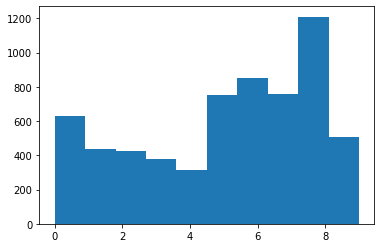

In [11]:
ans = []
for key in client_mapping:
    ans.extend([key] * len(client_mapping[key]))
plt.hist(ans)

### Using FedChem methods

In [ ]:
def gen_hetero_split_scaffold(dataset_name, train_split, num_clients, alpha, min_size):
    data = getDataset(dataset_name)
    train_data = data[:int(train_split*len(data))]
    smiles_list = train_data[0]
    cluster_idx = scaffold_clustering(smiles_list)
    client_mapping = non_iid_partition_with_dirichlet_distribution(cluster_idx,
                                                                   client_num=num_clients,
                                                                   alpha=alpha, 
                                                                   min_size=min_size)
    
    with open(f"scaffold_{dataset_name}_train_{train_split}_clients_{clients}_alpha_{alpha}.json", "w") as f:
        json.dump(client_mapping, f, indent=4)

    return client_mapping

client_mapping = gen_hetero_split_scaffold(dataset_name="Tox21",
                                           train_split=0.8,
                                           num_clients=10,
                                           alpha=0.5,
                                           min_size=128)
    

Loading previously saved dgl graphs...
{0: [1665, 681, 6037, 4658, 1851, 1294, 4221, 2596, 924, 489, 4189, 1821, 5975, 4544, 1336, 179, 5613, 4368, 3467, 4367, 2711, 5508, 4663, 59, 2878, 319, 2958, 3600, 4631, 655, 1224, 1180, 3259, 1399, 5117, 3351, 1930, 3315, 5954, 6035, 1561, 5165, 4363, 820, 1529, 3068, 3373, 726, 2353, 1812, 4244, 1897, 1366, 2871, 947, 5017, 2674, 6182, 6219, 3057, 858, 3236, 3666, 1830, 4968, 4592, 3517, 692, 3828, 1868, 1825, 3804, 3661, 694, 1896, 22, 5154, 1649, 5615, 3136, 3306, 1082, 3260, 4853, 1143, 3498, 1749, 2173, 4102, 3376, 3308, 5173, 526, 5890, 5688, 2540, 4639, 5832, 3700, 1697, 4518, 5779, 6157, 1150, 2065, 3677, 2055, 6034, 4698, 1584, 2693, 3725, 5792, 5711, 6204, 6258, 3846, 3317, 1105, 3587, 3261, 102, 5828, 1784, 294, 4125, 712, 5103, 2616, 5727, 5371, 1533, 3077, 355, 3794, 2827, 992, 2993, 1296, 5295, 5425, 1817, 4443, 6262, 2756, 3584, 1809, 2180, 4693, 2611, 5086, 5827, 5002, 5358, 2286, 5208, 5808, 3685, 4607, 5959, 6105, 278, 4594, 2

(array([ 178.,  314.,  523.,  627.,  627., 1055.,  627.,  627.,  627.,
        1059.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

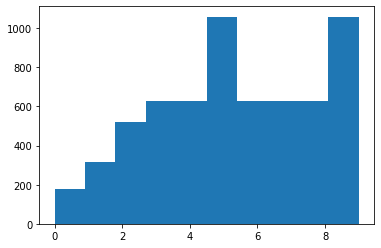

In [ ]:
import matplotlib.pyplot as plt
ans = []
for key in client_mapping:
    ans.extend([key] * len(client_mapping[key]))
plt.hist(ans)

## Comparing datasets

We can also compare the heterogeneity across datasets (or similarly, homogenity within datasets). The standard chemical way to do this is to use molecular fingerprints using a Tanimoto similarity score. 

In [17]:
import rdkit.DataStructs

def stddev_tanimoto_within_dataset(smiles_list, sample_size=None): 
    """
    Returns standard devitaion of average tanimoto similarity for each molecule sample
    """   
    if sample_size:
        sample_smiles = np.random.choice(smiles_list, sample_size)
        fps_list = get_fingerprints(sample_smiles)
    else:
        fps_list = get_fingerprints(smiles_list)

    scores = []
    for fp in fps_list:
        scores.append(sum(rdkit.DataStructs.BulkTanimotoSimilarity(fp, fps_list)) / len(fps_list))
    return np.std(np.asarray(scores))

In [21]:
import json

with open("tox21_ours.json") as f:
    mapping = json.load(f)

var_per_client = []
smiles_list = np.asarray(smiles_list)
for key in mapping:
    client_idx = np.asarray(mapping[key])
    smiles_client = smiles_list[client_idx]
    tanimoto_var_per_client.append(stddev_tanimoto_within_dataset(smiles_client, sample_size=100))

print(var_per_client)
print(np.mean(var_per_client))


[0.030725671557810752, 0.03926421902433585, 0.03150499568241039, 0.025422275221611616, 0.02306502185670502, 0.045976197131261, 0.02404168273168588, 0.03357025308366321, 0.02519625086583086, 0.02204742377859475]
0.007398697142368088
